In [73]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
df = pd.read_csv("C:/Users/ss/Desktop/train.csv/train.csv", encoding= "utf-8", nrows = 50000)

In [75]:
df['distance'] = ((df['dropoff_longitude'] - df['pickup_longitude'])**2 + (df['dropoff_latitude'] - df['pickup_latitude'])**2)**0.5

In [76]:
df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


In [77]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
dtype: object

In [78]:
df = df[(df['passenger_count'] > 0) & (df['fare_amount'] > 0)]

In [79]:
df = df[(df['pickup_longitude'] >= -74.255) & (df['pickup_longitude'] <= -73.70)]
df = df[(df['dropoff_longitude'] >= -74.255) & (df['dropoff_longitude'] <= -73.70)]
df = df[(df['pickup_latitude'] >= 40.50) & (df['pickup_latitude'] <= 40.92)]
df = df[(df['dropoff_latitude'] >= 40.50) & (df['dropoff_latitude'] <= 40.92)]      

In [80]:
train_input, test_input, train_target, test_target = train_test_split(np.array(df['distance']), np.array(df['fare_amount']), random_state=42)

In [81]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [82]:
train_input

array([[0.01592358],
       [0.00888725],
       [0.04534232],
       ...,
       [0.01358242],
       [0.00411612],
       [0.01136863]])

In [83]:
test_input

array([[0.01488596],
       [0.06330321],
       [0.00948267],
       ...,
       [0.01782428],
       [0.01332025],
       [0.00169919]])

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(train_input, train_target)

LinearRegression()

In [88]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7714352963904302
0.7577935846109731


<function matplotlib.pyplot.show(close=None, block=None)>

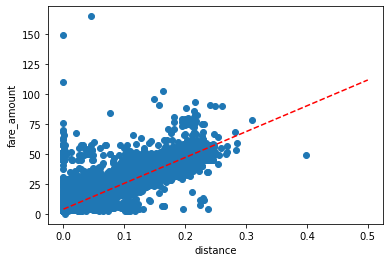

In [89]:
plt.scatter(train_input, train_target)
plt.plot([0, 0.5], [0*lr.coef_+lr.intercept_,0.5*lr.coef_+lr.intercept_],
color='red',linestyle='--')
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show

In [90]:
train_poly =np.column_stack((train_input**2,train_input))
test_poly =np.column_stack((test_input**2,test_input))
print(train_poly[0:5])
print(train_poly.shape,test_poly.shape)

[[2.53560305e-04 1.59235770e-02]
 [7.89831530e-05 8.88724665e-03]
 [2.05592581e-03 4.53423181e-02]
 [3.08637551e-03 5.55551574e-02]
 [2.02299600e-03 4.49777278e-02]]
(36529, 2) (12177, 2)


In [91]:
lr =LinearRegression()
lr.fit(train_poly,train_target)

print(lr.coef_,lr.intercept_)

[-29.01785543 221.01027455] 3.879458668970848


In [92]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.7715133440659441
0.757808935104796


<function matplotlib.pyplot.show(close=None, block=None)>

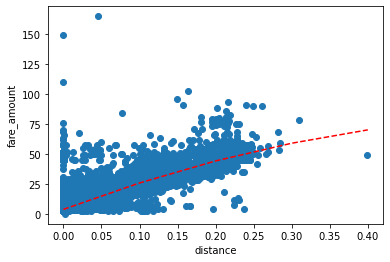

In [93]:
point = np.arange(0,0.5,0.1)
plt.scatter(train_input, train_target)
plt.plot(point, -181.47*point**2 + 238.44*point + 3.82, color='red',linestyle='--')
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show

In [94]:
lr.predict([[0.04,0.2]])

array([46.92079936])

# RobustScaler 스케일링

In [95]:
from sklearn.preprocessing import RobustScaler

In [96]:
rbs = RobustScaler()
train_input_scaled = rbs.fit_transform(train_input)
test_input_scaled = rbs.fit_transform(test_input)

In [97]:
lr.fit(train_input_scaled,train_target)

LinearRegression()

In [98]:
print(lr.score(train_input_scaled, train_target))
print(lr.score(test_input_scaled, test_target))

0.7714352963904302
0.7577368941246171


<function matplotlib.pyplot.show(close=None, block=None)>

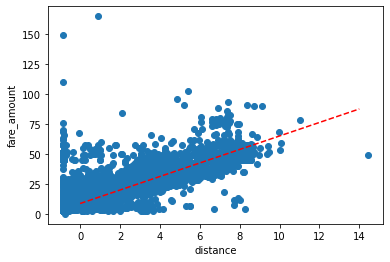

In [99]:
plt.scatter(train_input_scaled, train_target)
plt.plot([0, 14], [0*lr.coef_+lr.intercept_,14*lr.coef_+lr.intercept_],
color='red',linestyle='--')
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show

# Normalizer 스케일링

In [100]:
from sklearn.preprocessing import Normalizer

In [101]:
norm = Normalizer()

In [102]:
train_input_scaled = norm.fit_transform(train_input)
test_input_scaled = norm.transform(test_input)

In [68]:
lr.fit(train_input_scaled,train_target)

LinearRegression()

In [69]:
print(lr.score(train_input_scaled, train_target))
print(lr.score(test_input_scaled, test_target))

0.00023122511763529197
-0.0004659669689766055


In [70]:
train_input_scaled

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

<function matplotlib.pyplot.show(close=None, block=None)>

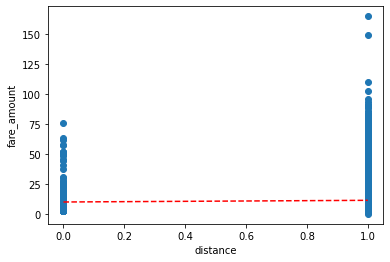

In [72]:
plt.scatter(train_input_scaled, train_target)
plt.plot([0, 1], [0*lr.coef_+lr.intercept_,1*lr.coef_+lr.intercept_],
color='red',linestyle='--')
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show

# MinMaxScaler 스케일링

In [103]:
from sklearn.preprocessing import MinMaxScaler


In [105]:
mms = MinMaxScaler()
mms.fit(train_input)
train_input_scaled = mms.transform(train_input)
test_input_scaled = mms.transform(test_input)
lr.fit(train_input_scaled, train_target)
print('모델의 정확도 :', round(lr.score(train_input_scaled, train_target), 4))
print('모델의 정확도 :', round(lr.score(test_input_scaled, test_target), 4))

모델의 정확도 : 0.7714
모델의 정확도 : 0.7578


In [106]:
lr.coef_

array([86.03250465])

<function matplotlib.pyplot.show(close=None, block=None)>

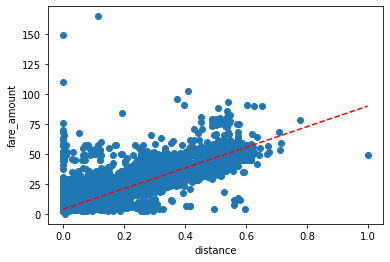

In [109]:
plt.scatter(train_input_scaled, train_target)
plt.plot([0, 1], [0*lr.coef_+lr.intercept_,1*lr.coef_+lr.intercept_],
color='red',linestyle='--')
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show